In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats


In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRxp-hsw61ck9cpt5ExZIUhvSGT5zYzoUJl_7xr7YF5qZeazC8393q2taqwkDvMxVirgFDJm1WX3uAC/pub?output=csv')
df.head()



,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
## Filtering out males and females to separate variables
males = df.loc[df['Gender']=='Male'].copy()
females = df.loc[df['Gender']=='Female'].copy()


In [4]:
females['Height'].head()



5000    58.910732
5001    65.230013
5002    63.369004
5003    64.479997
5004    61.793096
Name: Height, dtype: float64

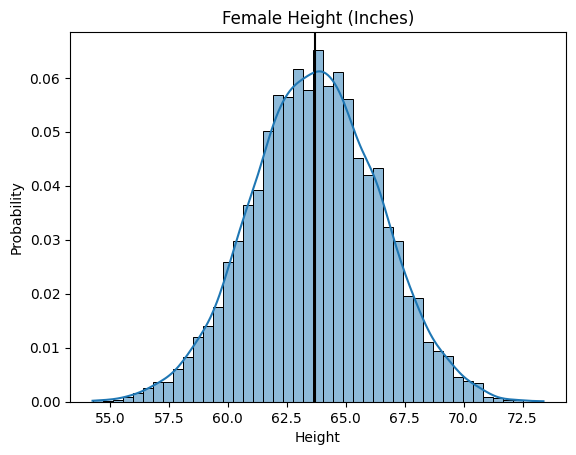

In [5]:
## Plot a histogram of probabilities for female height
ax = sns.histplot(x=females['Height'],stat='probability',kde=True)
ax.axvline(females['Height'].mean(), color='k')
ax.set_title("Female Height (Inches)");


In [6]:
## manually calc z-score conversion
mean = females["Height"].mean()
std = females["Height"].std()
z_scores_manual = (females['Height'] -  mean)/std
z_scores_manual.head(3)


5000   -1.779502
5001    0.564198
5002   -0.126014
Name: Height, dtype: float64

In [7]:
## Calculating z-scores with scipy.stats.zscore
z_scores_scipy = stats.zscore(females['Height'])
z_scores_scipy[0:3]


5000   -1.779680
5001    0.564255
5002   -0.126027
Name: Height, dtype: float64

In [8]:
scaler = StandardScaler()
z_scores_scaler = scaler.fit_transform(females[['Height']])
z_scores_scaler[:3]


array([[-1.77967952],
       [ 0.56425475],
       [-0.12602672]])

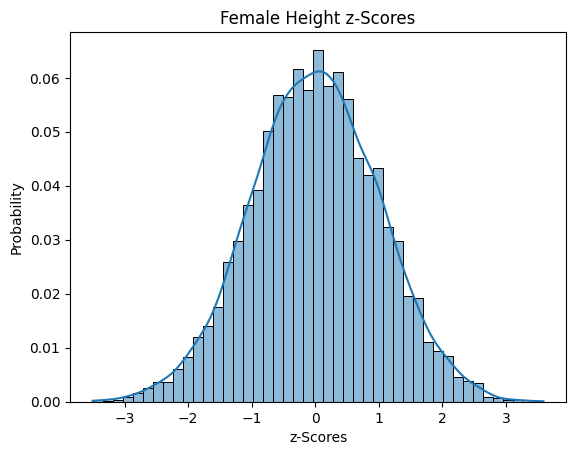

In [9]:
## Plot a histogram with z-scores
ax = sns.histplot(x=z_scores_manual,stat='probability',kde=True)
ax.set_xlabel("z-Scores")
ax.set_title("Female Height z-Scores");
